In [1]:
#!/usr/bin/env python

In [2]:
import numpy as np
from numpy import ones
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from numpy import genfromtxt
from numpy import mean
from numpy.random import randn
import sys

these make printing nicer

In [3]:
np.set_printoptions(precision=4)
np.set_printoptions(threshold=30)
np.set_printoptions(linewidth=300)
np.set_printoptions(suppress=True)
np.set_printoptions(threshold=sys.maxsize)

In [4]:
X = genfromtxt('stock_prediction_data.csv', delimiter=',')
X = preprocessing.scale(X)
n = X.shape[0]
η = 0.01

In [5]:
y = genfromtxt('stock_price.csv', delimiter=',')
y = np.reshape(y, (n,1))

In [6]:
Ⅱ = ones((n,1))	# this is a column vector of 1s
Φ = np.hstack((X,Ⅱ))
d = Φ.shape[1]
w = randn(d,1)

The function we are trying to minimize is<br>
$$\min_w \; f(x) = \frac{1}{n} \; \sum_i^n \; (w^{\top} \phi(x_i) - y_i)^2$$

In [7]:
def f(w):
	fₒ = 0						# function output
	for ϕᵢ, yᵢ in zip(Φ,y):
		ϕᵢ = np.reshape(ϕᵢ, (d,1))		# make sure the ϕᵢ is in column format
		fₒ += (w.T.dot(ϕᵢ) - yᵢ)**2
	return ((1/n)*fₒ).item()	# this is the mse
#	

The equation for the gradient is <br>
$$f'(x) = \frac{2}{n} \; \sum_i^n \; (w^{\top} \phi(x_i) - y_i) \phi(x_i)$$<br>
You can rewrite it into compact matrix vector form if you are good, note that $y$ is a column vector of all labels.<br>
$$f'(x) = \frac{2}{n} \Phi^{\top}(\Phi w - y)$$<br>
[The derivation can be found here](https://github.khoury.northeastern.edu/chieh/course_page/blob/main/4420/lecture_4/compact_regression_derivative_derivation.pdf)	

In [8]:
def ᐁf(w):
	advanced_approach = False
	if advanced_approach:
		return (2/n)*Φ.T.dot(Φ.dot(w) - y) # derivative in compact matrix form
	else:
		grads = np.zeros((d, 1))	
		for ϕᵢ,yᵢ in zip(Φ,y):	# loop through both x and y each sample
			ϕᵢ = np.reshape(ϕᵢ, (d,1)) # make sure it is in column format
			grads += (w.T.dot(ϕᵢ) - yᵢ)*ϕᵢ
	return (2/n)*grads

In [9]:
mse_list = []
for i in range(200):
	w = w - η*ᐁf(w)				# gradient descent update w
	mse_list.append(f(w))

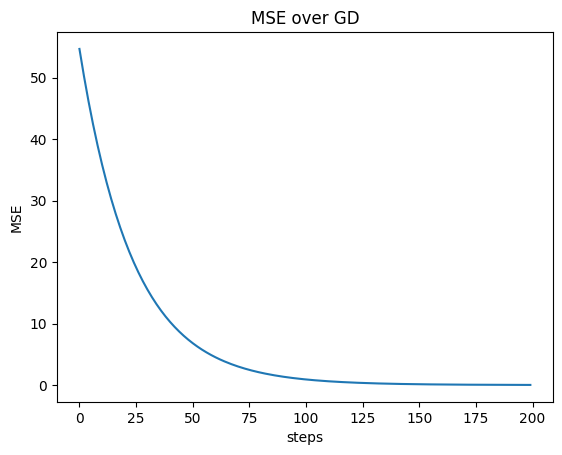

In [10]:
plt.plot(mse_list)
plt.title('MSE over GD')
plt.xlabel('steps')
plt.ylabel('MSE')
plt.show() 						# Display the plot

my stock price change prediction

In [11]:
ŷ = Φ.dot(w)
Y = np.hstack((ŷ, y))
print('Side by side comparison ŷ vs y') 
print(Y[0:20,:])

Side by side comparison ŷ vs y
[[ -0.1776  -0.31  ]
 [-16.2978 -16.86  ]
 [  1.5081   1.36  ]
 [ 12.3821  12.75  ]
 [  7.6707   7.91  ]
 [ -2.9911  -2.75  ]
 [ -0.4365  -0.54  ]
 [-10.8726 -11.51  ]
 [ -4.163   -4.01  ]
 [  3.4171   3.08  ]
 [ -7.9627  -8.23  ]
 [ -0.0077  -0.14  ]
 [  2.1264   2.56  ]
 [ -6.8421  -6.87  ]
 [  4.4935   4.43  ]
 [  1.786    1.98  ]
 [  3.7326   3.76  ]
 [  3.9302   4.16  ]
 [  6.3672   6.67  ]
 [ -6.9501  -7.21  ]]
